Nos saltamos la parte de verificar la versión del Scikit-learn ya que ya lo hicimos para el reporte anterior.

In [1]:
# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)

# define the model
model = ExtraTreesClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.908 (0.026)


In [2]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)

# define the model
model = ExtraTreesClassifier()

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [[-3.52169364,4.00560592,2.94756812,-0.09755101,-0.98835896,1.81021933,-0.32657994,1.08451928,4.98150546,-2.53855736,3.43500614,1.64660497,-4.1557091,-1.55301045,-0.30690987,-1.47665577,6.818756,0.5132918,4.3598337,-4.31785495]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


Igual se pueden usar para hacer predicciones de clases, asi a como también se puede con random forest.

In [3]:
# evaluate extra trees ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)

# define the model
model = ExtraTreesRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.062 (5.351)


MAE = mean absolute error.

In [4]:
# extra trees for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)

# define the model
model = ExtraTreesRegressor()

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [[-0.56996683,0.80144889,2.77523539,1.32554027,-1.44494378,-0.80834175,-0.84142896,0.57710245,0.96235932,-0.66303907,-1.13994112,0.49887995,1.40752035,-0.2995842,-0.05708706,-2.08701456,1.17768469,0.13474234,0.09518152,-0.07603207]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 53


Ahora vemos como se hace una prediccion con regresión, a como tambié se puede hacer con random forest.

>10 0.858 (0.032)
>50 0.905 (0.029)
>100 0.911 (0.026)
>500 0.911 (0.024)
>1000 0.912 (0.026)
>5000 0.911 (0.026)


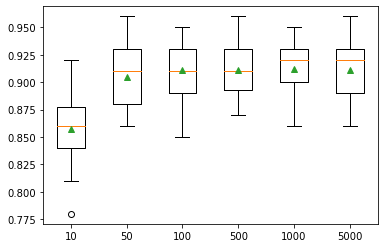

In [5]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Podemos observar que cuantos más arboles de decisión hayan mejores resultado da, pero también es mucho más lento el proceso de ejecución, por ejemplo: el caso con 5000 arboles tardó aproximadamente 2 minutos en ejecución.

>1 0.893 (0.021)
>2 0.906 (0.021)
>3 0.903 (0.023)
>4 0.913 (0.027)
>5 0.907 (0.025)
>6 0.911 (0.027)
>7 0.912 (0.024)
>8 0.909 (0.028)
>9 0.907 (0.026)
>10 0.906 (0.022)
>11 0.910 (0.022)
>12 0.911 (0.023)
>13 0.908 (0.025)
>14 0.908 (0.026)
>15 0.910 (0.024)
>16 0.911 (0.024)
>17 0.906 (0.026)
>18 0.905 (0.023)
>19 0.911 (0.027)
>20 0.904 (0.025)


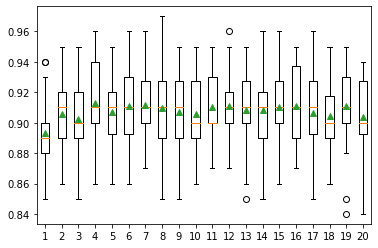

In [6]:
# explore extra trees number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    
    # explore number of features from 1 to 20
    for i in range(1, 21):
        models[str(i)] = ExtraTreesClassifier(max_features=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>2 0.905 (0.028)
>3 0.908 (0.028)
>4 0.905 (0.025)
>5 0.904 (0.030)
>6 0.907 (0.026)
>7 0.898 (0.029)
>8 0.895 (0.024)
>9 0.898 (0.026)
>10 0.893 (0.026)
>11 0.892 (0.029)
>12 0.892 (0.028)
>13 0.887 (0.028)
>14 0.888 (0.030)


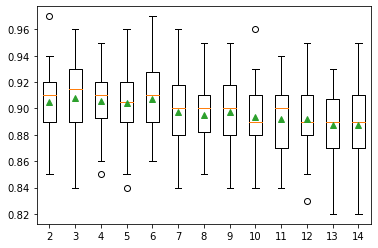

In [7]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()

    # explore the number of samples per split from 2 to 14
    for i in range(2, 15):
        models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()